In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("Model2.csv")

In [7]:
df.head()

,Unnamed: 0,season,yr,mnth,weathersit,temp,registered,cnt,weekend,daytype,windspeed_median,hum_median,fri,mon,sat,sun,thur,tue,wed
0,0,1,0,1,2,0.344167,654,985,1,1,0.160446,0.805833,0,0,1,0,0,0,0
1,1,1,0,1,2,0.363478,670,801,1,1,0.248539,0.696087,0,0,0,1,0,0,0
2,2,1,0,1,1,0.196364,1229,1349,0,3,0.248309,0.437273,0,1,0,0,0,0,0
3,3,1,0,1,1,0.200000,1454,1562,0,3,0.160296,0.590435,0,0,0,0,0,1,0
4,4,1,0,1,1,0.226957,1518,1600,0,3,0.186900,0.436957,0,0,0,0,0,0,1


In [8]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
df.columns

Index(['season', 'yr', 'mnth', 'weathersit', 'temp', 'registered', 'cnt',
       'weekend', 'daytype', 'windspeed_median', 'hum_median', 'fri', 'mon',
       'sat', 'sun', 'thur', 'tue', 'wed'],
      dtype='object')

In [10]:
X=df.drop(["cnt"],axis=1)

In [11]:
X

,season,yr,mnth,weathersit,temp,registered,weekend,daytype,windspeed_median,hum_median,fri,mon,sat,sun,thur,tue,wed
0,1,0,1,2,0.344167,654,1,1,0.160446,0.805833,0,0,1,0,0,0,0
1,1,0,1,2,0.363478,670,1,1,0.248539,0.696087,0,0,0,1,0,0,0
2,1,0,1,1,0.196364,1229,0,3,0.248309,0.437273,0,1,0,0,0,0,0
3,1,0,1,1,0.200000,1454,0,3,0.160296,0.590435,0,0,0,0,0,1,0
4,1,0,1,1,0.226957,1518,0,3,0.186900,0.436957,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,2,0.254167,1867,0,3,0.350133,0.652917,0,0,0,0,1,0,0
727,1,1,12,2,0.253333,2451,0,3,0.155471,0.590000,1,0,0,0,0,0,0
728,1,1,12,2,0.253333,1182,1,1,0.124383,0.752917,0,0,1,0,0,0,0
729,1,1,12,1,0.255833,1432,1,1,0.350754,0.483333,0,0,0,1,0,0,0


In [12]:
y=df["cnt"]

In [13]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

# Spliting the data into train and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False ,random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [20]:
model.score(X_test,y_test)

0.9293360713338368

In [18]:
r2_scr

0.9293360713338368

In [19]:
mse

192701.38098863148

# Ridge Regularization

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge_reg = Ridge()

In [19]:
ridge_reg.fit(X_train, y_train)

Ridge()

In [21]:
y_pred=ridge_reg.predict(X_test)

In [22]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [23]:
r2_scr

0.926527982478234

In [24]:
mse

200359.072976999

In [28]:
from sklearn.model_selection import GridSearchCV


parameters = [{'alpha':[0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = ridge_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [34]:
y_pred=grid_search.predict(X_test)

In [35]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [36]:
r2_scr

0.9293071402893422

In [37]:
mse

192780.2762939559

# Lasso Regularization

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_reg = Lasso()

In [41]:
lasso_reg.fit(X_train, y_train)

Lasso()

In [42]:
y_pred=lasso_reg.predict(X_test)

In [43]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [44]:
r2_scr

0.9275910399615048

In [45]:
mse

197460.10247021657

In [46]:
parameters = [{'alpha':[0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = lasso_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [47]:
y_pred=grid_search.predict(X_test)

In [48]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [49]:
r2_scr

0.9293354208172284

In [50]:
mse

192703.15495522463

# Comparison of all the models and their R2_score,MSE

In [3]:
table=pd.DataFrame({
        "Model":['Linear Regression','Ridge Regression','Lasso Regression','Grid_Searched_Ridge','Grid_Searched_Lasso'],
        "R2_score":[0.929,0.926,0.927,0.929,0.929],
        "MSE":[192701.38,200359.07,197460.10,192780.27,192703.15]
})
table

,Model,R2_score,MSE
0,Linear Regression,0.929,192701.38
1,Ridge Regression,0.926,200359.07
2,Lasso Regression,0.927,197460.10
3,Grid_Searched_Ridge,0.929,192780.27
4,Grid_Searched_Lasso,0.929,192703.15


<AxesSubplot:xlabel='Model', ylabel='MSE'>

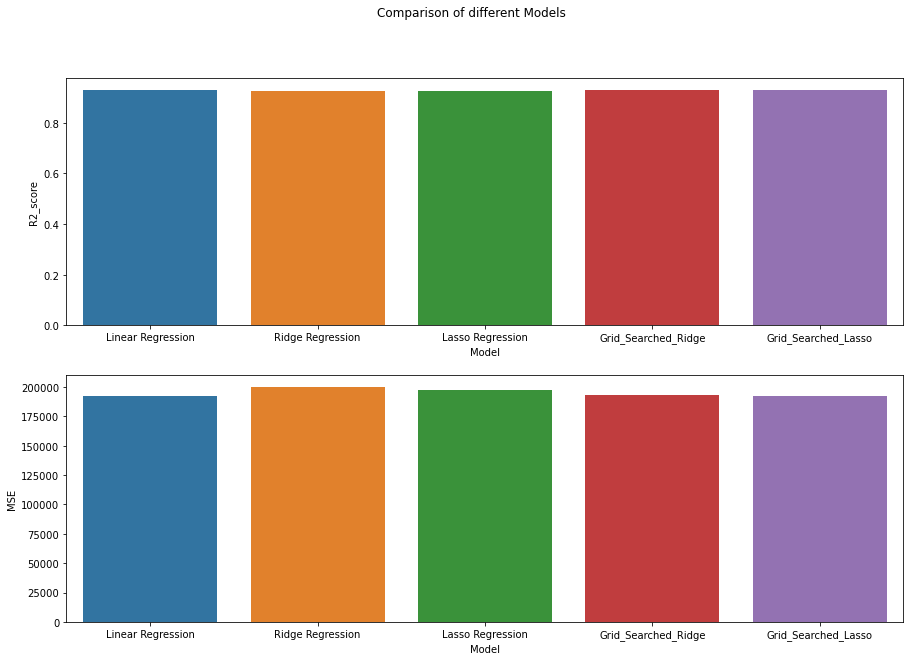

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

fig.suptitle('Comparison of different Models')

sns.barplot(ax=axes[0], data=table, x='Model', y='R2_score')
sns.barplot(ax=axes[1], data=table, x='Model', y='MSE')